In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

#통계적 검정
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import scipy.stats
from scipy.stats import chi2_contingency

#모델 구축
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



#성능 검증
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, roc_auc_score
from xgboost import plot_importance

pd.options.display.max_columns = None

In [2]:
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn_clean.csv')
df

,customerID,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SeniorCitizen,Churn_Yes
0,7590-VHVEG,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NO,0
1,5575-GNVDE,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,NO,0
2,3668-QPYBK,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,NO,1
3,7795-CFOCW,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,NO,0
4,9237-HQITU,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,NO,0
7039,2234-XADUH,Female,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,NO,0
7040,4801-JZAZL,Female,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,NO,0
7041,8361-LTMKD,Male,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,YES,1


In [3]:
X = df[['gender', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']]

Y = df['Churn_Yes']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=1234)

In [4]:
from imblearn.pipeline import make_pipeline

numeric_pipe  = make_pipeline( SimpleImputer(strategy='median'), MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), 
                               OneHotEncoder(handle_unknown='ignore') )

In [5]:
numeric_list = ['tenure','MonthlyCharges','TotalCharges']
category_list = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

preprocessing_pipe = make_column_transformer((numeric_pipe,numeric_list),
                                             (category_pipe,category_list))
preprocessing_pipe

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod',
                                  'SeniorCitizen'])])

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
model_pipe = make_pipeline(preprocessing_pipe, SMOTE(), XGBClassifier())
model_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(han...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [8]:
hyperparameter = {'xgbclassifier__max_depth':range(3,6),
                 'xgbclassifier__learning_rate': np.random.uniform(0.01, 0.3,5),
                 'xgbclassifier__gamma': range(1,5),
                 'xgbclassifier__colsample_bytree': np.random.uniform(0, 1,5),
                 'xgbclassifier__lambda': range(1,4),
                 'xgbclassifier__scale_pos_weight': [1,3,5]}
grid_model = GridSearchCV(model_pipe,param_grid=hyperparameter,cv=5,n_jobs=-1,scoring='f1')

In [9]:
grid_model.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('oneh...
             param_grid={'xgbclassifier__colsample_bytree': array([0.93769167, 0.53097747, 0.91162978, 0.29131562, 0.53481035]),
                         'xgbclassifier__gamma': range(1, 5),
                         'xgbclassifier__lambda': range(1, 4),
                         'xgbclassifier__learning_rate': array([0.26775544, 0.08240402, 0.274875  , 0.22482768, 0.19243799]),
                         'xgbclassifier__max_depth': range(3, 6),
                         'xgbclassifier__scale_pos_weight': [1, 3, 5]},
             scoring='f1')

In [10]:
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(han...
                               feature_types=None, gamma=4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1,
                               learning_rate=0.27487500486634736, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=None,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [11]:
# 예측 확률
pred_probs  = best_model.predict_proba(X_test)[:, 1]
print("predict() 수행 결과값 10개만 표시")
print(np.round(pred_probs[:10], 3))

# 예측 분류
preds = best_model.predict(X_test)
print("예측 분류 10개만 표시")
print(f"{preds[:10]}")

predict() 수행 결과값 10개만 표시
[0.157 0.197 0.025 0.881 0.452 0.196 0.204 0.829 0.017 0.015]
예측 분류 10개만 표시
[0 0 0 1 0 0 0 1 0 0]


정확도: 0.7672, 정밀도: 0.5407, 재현율: 0.6827, F1: 0.6035, AUC: 0.8279


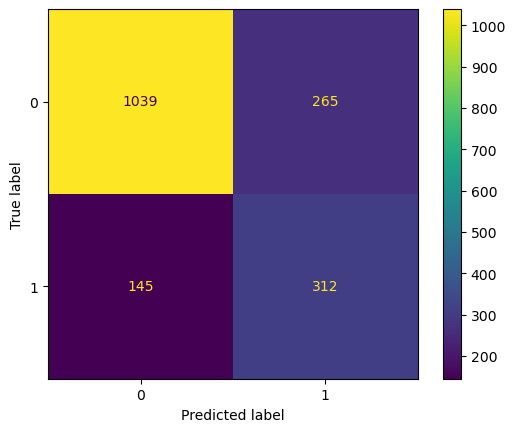

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


def get_clf_eval(y_test, pred=None, pred_proba_po=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba_po)
   
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    cm_display = ConfusionMatrixDisplay(confusion).plot()

get_clf_eval(Y_test, pred = preds, pred_proba_po = pred_probs)

In [13]:
def func_eval(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred  = model.predict(X_test)
    train_acc = accuracy_score(Y_train, Y_train_pred)
    test_acc  = accuracy_score(Y_test, Y_test_pred)
    train_f1  = f1_score(Y_train, Y_train_pred)
    test_f1   = f1_score(Y_test, Y_test_pred)
    return [train_acc, test_acc, train_f1, test_f1]

In [15]:
func_eval(best_model)

[0.8055660734570238,
 0.7671777399204998,
 0.6715701950751519,
 0.6034816247582205]

In [ ]:
result = pd.DataFrame(grid_model.cv_results_).sort_values(by="rank_test_score").head()
result

In [ ]:
best_model.named_steps

In [ ]:
model_dt = best_model.named_steps['xgbclassifier']
model_dt

In [ ]:
model_dt.feature_importances_

In [ ]:
preprocessing_pipe.fit(X_train)
model_pipe.named_steps["columntransformer"].get_feature_names_out()

In [ ]:
model_dt.get_booster().get_fscore()

In [ ]:
b = pd.DataFrame()
b['name'] = model_pipe.named_steps["columntransformer"].get_feature_names_out()
b['value'] = model_dt.feature_importances_
b

In [ ]:
var_f1 = model_dt.get_booster().get_fscore()
var_f1['f9'] =0
var_f1['f10'] =0
var_f1['f12'] =0
var_f1['f16'] =0
var_f1['f18'] =0
var_f1['f21'] =0
var_f1['f24'] =0
var_f1['f27'] =0
var_f1['f30'] =0
var_f1['f33'] =0




var_f1 = pd.DataFrame.from_dict(var_f1, orient='index')
var_f1.index.name = 'F'
var_f1.reset_index(inplace=True)
var_f1['F'] = var_f1['F'].str.split('f', n=2, expand=True)[1].astype(int)
var_f1.set_index('F', inplace=True)
var_f1.sort_index(ascending=True, inplace=True)
var_f1

In [ ]:
featue_im = pd.concat([b,var_f1], axis=1)
featue_im.rename(columns={0:'F1_score'}, inplace=True)
featue_im_sort = featue_im.sort_values('F1_score', ascending= False)
featue_im_sort

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(data= featue_im_sort, x='F1_score', y='name')

In [ ]:
plot_importance(model_dt)
plt.show()